#Analisis Univariado

El analisis univariado es  el analisis particular de cada variable independiente y por si misma. La idea es poder obtener cierta informacion la cual sea descriptiva a la variable y que ademas podamos realizar algunos graficos sobre algunos de ellas

El procedimiento sera hacer una tabla estilo dataframe con todas las columnas donde vamos a obtener:



* cantidad de Datos
* tipo de dato
* Valores unicos
* Valores nulos
* Promedio
* Maximo
* minimo
* Quartiles
* Sesgo y kurtosis

Con toda esta info podremos obtener cierta relacion donde determinemos variables numerica o categoricas , cuales tiene mucho variabilidad , promedio y medidas centrales.

Luego de eso determnaremos algunos graficos de variables numericas y otras categoricas , cosas que nos llamaron la atencion.

Tambien es recomendable realizar alguna tabla de frecuencia con algunas variables



## Dataframe con infomracion generica

Aqui realizaremos una obtencion global de todas las columnas que son las variables de un dataframe pero de nivel univriado , es decir individual



In [ ]:
import pandas as pd

In [ ]:
list(pd.read_csv("winemag-data_first150k.csv", nrows =1))

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [ ]:
import pandas as pd
cols = list(pd.read_csv("winemag-data_first150k.csv", nrows =1))
df = pd.read_csv('winemag-data_first150k.csv', usecols =[i for i in cols if i != 'Unnamed: 0'])

In [ ]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [ ]:
df.describe(include = 'all')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,150925,150930,105195,150930.000000,137235.000000,150925,125870,60953,150930,150930
unique,48,97821,30621,NaN,NaN,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,NaN,NaN,44508,6209,13057,14482,374
mean,NaN,NaN,NaN,87.888418,33.131482,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.222392,36.322536,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,24.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
from pandas.api.types import is_numeric_dtype
import numpy as np


def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #create a dataframe with especificas columnas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]

      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df)
df_uni_stats




<ipython-input-11-51390ec017a1>:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T


,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
country,150925,object,5,48,False,US,-,-,-,-,-,-,-,-,-
description,150930,object,0,97821,False,A little bit funky and unsettled when you pop ...,-,-,-,-,-,-,-,-,-
designation,105195,object,45735,30621,False,Reserve,-,-,-,-,-,-,-,-,-
points,150930,int64,0,21,True,-,87.888418,3.222392,80.0,86.0,88.0,90.0,100.0,0.142833,-0.286416
price,137235,float64,13695,357,True,-,33.131482,36.322536,4.0,16.0,24.0,40.0,2300.0,11.8201,372.824222
province,150925,object,5,455,False,California,-,-,-,-,-,-,-,-,-
region_1,125870,object,25060,1236,False,Napa Valley,-,-,-,-,-,-,-,-,-
region_2,60953,object,89977,18,False,Central Coast,-,-,-,-,-,-,-,-,-
variety,150930,object,0,632,False,Chardonnay,-,-,-,-,-,-,-,-,-
winery,150930,object,0,14810,False,Williams Selyem,-,-,-,-,-,-,-,-,-


## Tabla de Fracuencias

Vamos a genera una tabla de frecuencias para las varialbes que queramos.

Inicialmente lo haremos de manera sencilla , con codigos faciles de aplicar y luego dejare una funciones donde se podra generar tablas de frecuencias mucho mas completas en base al tipo de dato y como deseamos tener los cortes



In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### uso de librearia sidetable

ESta librearia se une al dataframe y con la funcion stb podras genera tablas de frecuencia

In [ ]:
import sidetable
df.stb.freq(['country'])

,country,count,percent,cumulative_count,cumulative_percent
0,US,62397,41.343051,62397,41.343051
1,Italy,23478,15.556071,85875,56.899122
2,France,21098,13.979129,106973,70.878251
3,Spain,8268,5.478218,115241,76.356468
4,Chile,5816,3.853570,121057,80.210038
5,Argentina,5631,3.730992,126688,83.941030
6,Portugal,5322,3.526255,132010,87.467285
7,Australia,4957,3.284413,136967,90.751698
8,New Zealand,3320,2.199768,140287,92.951466
9,Austria,3057,2.025509,143344,94.976975


## Metodo mas complejo custom

Aqui la idea es poder generar tabla de frecuencias para categoricas ocmo para numericas , y esas numericas seran con intervalos o no

El metodo de seleccionde intervalos sera el de sturges



In [ ]:
#tabla de frecuencias custom
import math

def sturges_intervals(data):
  #sturges rules to select bin
  k = 1 + 3.322 * math.log10(len(data))
  periodos = math.ceil(k)

  #generacion de intervalos en base al rango y periodo
  intervals = pd.interval_range(
      start=data.min(),
      end=data.max() + 1,
      periods=k,
      name="Intervalo",
      closed="left")

  #redondeo de los valores de corte
  inter = pd.IntervalIndex([
    pd.Interval( round(i.left,1), round(i.right,1), i.closed )
    for i in intervals])

  return inter, periodos


def freq_table(df, col, with_cuts=True):

  #seleccion de data
  data = df[col]
  #data =df[df[col]<130][col]
  #verificacion de columna y si queremos cortes de intervalos
  if not is_numeric_dtype(data) or not with_cuts:
    #generaion de tabla de frecuenca ,con info absoluta
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)

  else:

    #generacion de dataframe con cortes
    freq_tab = pd.DataFrame(index=sturges_intervals(data)[0])
    freq_tab["FreqAbs"] = pd.cut(data, bins=freq_tab.index).value_counts()
    freq_tab["Marca"]  = freq_tab.index.mid

    freq_tab["LimInf"] = freq_tab.index.left
    freq_tab["LimSup"] = freq_tab.index.right


  #calculo del resto de la tabla de frecuencia
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

In [ ]:
freq_table(df, 'price', with_cuts=True)

In [ ]:
pd.crosstab(df['price'], columns='FreqAbs').sort_values('FreqAbs', ascending=False)

## Graficos

Aqui vamos hacer graficos donde podamos trabajar variables numericas como categoricas



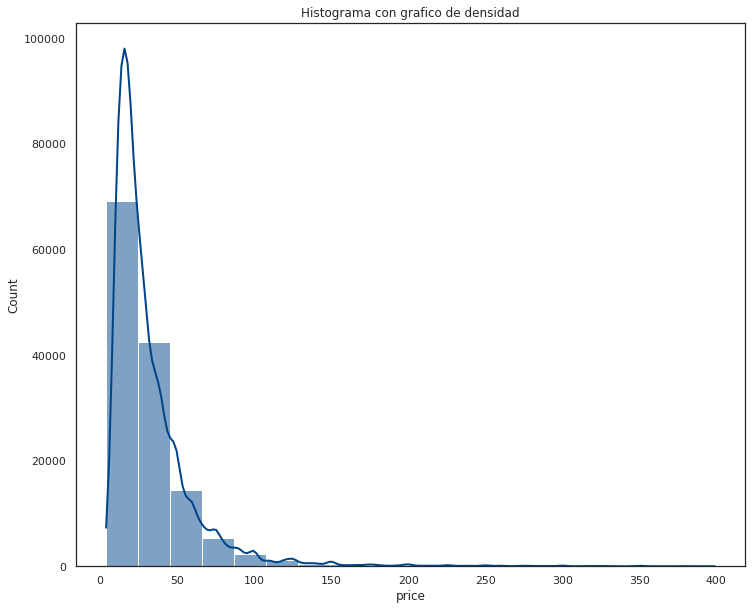

In [ ]:
#graficos

#cuantitativo
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", rc={"lines.linewidth": 2}) #seteo el lienzo color blanco y ancho linea 2
fig, axes = plt.subplots(figsize=(12,10)) # genero el lienzo y su tamano
sns.histplot(x='price',
            #data=df
            data=df[df['price']<400] ,
            color='#004488',
            ax=axes,
            bins= sturges_intervals(df['price'])[1],
            kde=True).set(title='Histograma con grafico de densidad');







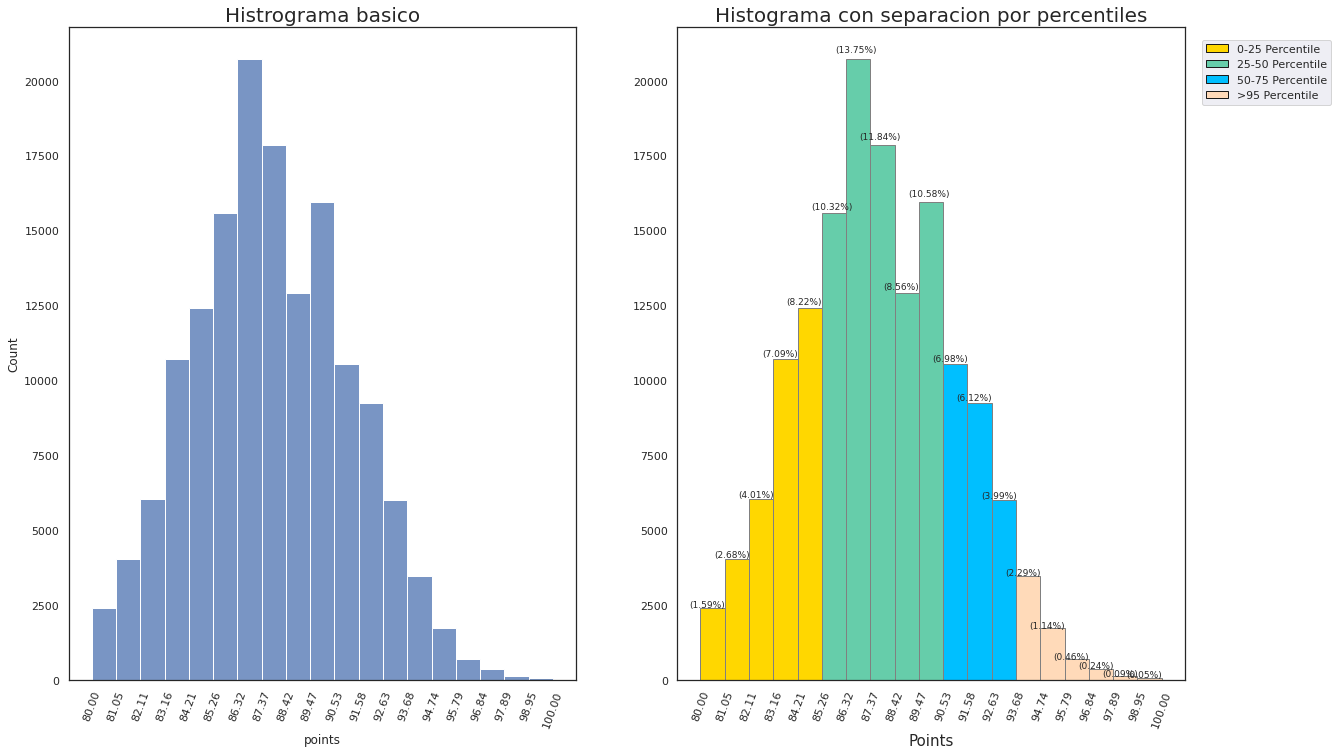

In [ ]:
#grafico numerico categorico
from matplotlib.patches import Rectangle
import numpy as np
fig , axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,12))

#grafico basico
sns.set_theme(rc={"font.size":9,"axes.titlesize":20,"axes.labelsize":15})
sns.histplot(data=df, x='points', ax=axes[0], bins='sturges').set(title='Histrograma basico', );
axes[0].tick_params(axis='x', rotation=70)


# Extraccion de la variable
data = df['points']

# Cambio de colores por percentil
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

#generacion de grafico en base a sturges
counts, bins, patches = axes[1].hist(data, facecolor=perc_50_colour, edgecolor='gray', bins='sturges')

#seteo de la variable x en su anotacion
axes[1].set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Genereo titulo y nombre de eje
plt.title('Histograma con separacion por percentiles', fontsize=20)
plt.xlabel('Points', fontsize=15)

#calculo de percentiles
q25, q75, q95 = np.percentile(data, [25, 75, 95])

#asignacion de colores segun barra y los valores de los percentiles
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside <= q25:
        patch.set_facecolor(perc_25_colour)
    elif leftside > q95:
        patch.set_facecolor(perc_95_colour)
    elif leftside >= q75:
        patch.set_facecolor(perc_75_colour)

# ubicaion central de los eje de la barras x
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]

# display de las anotaciones de cada barra en porcentaje
for i in range(len(bins)-1):
    bin_label = "({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i]- 1, counts[i]*1.01, bin_label, rotation_mode='anchor')

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


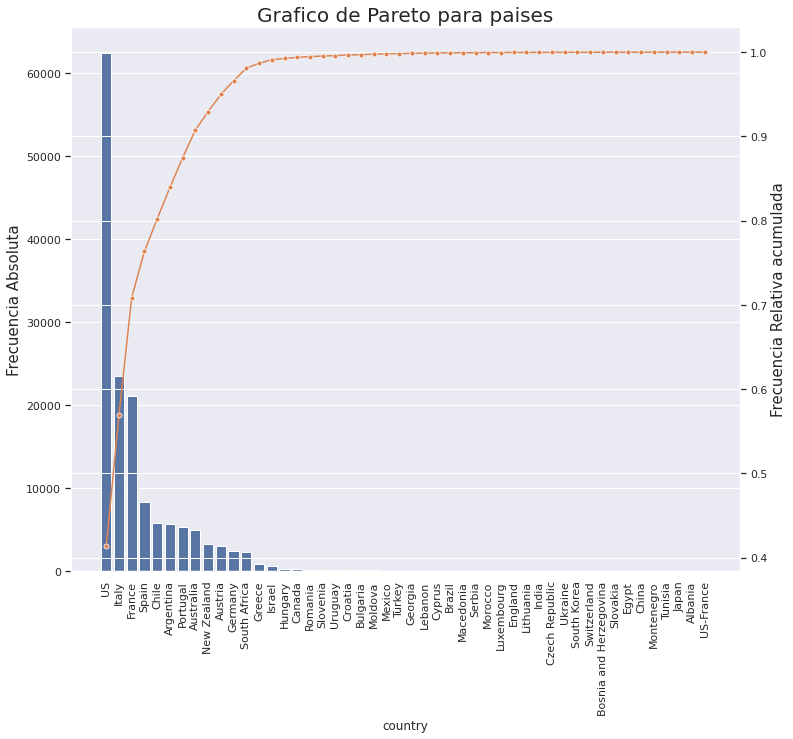

In [ ]:
#categorico
sns.set()
fig, axes = plt.subplots(figsize=(12,10))

paises = freq_table(df, 'country', with_cuts=False).reset_index().sort_values('FreqAbs', ascending=False)

sns.barplot(data=paises, x='country', y='FreqAbs', ax=axes, color="C0")
ax2 = axes.twinx()
sns.lineplot(paises['country'], paises["FAbsRelativa"], color="C1", marker="o", ms=5, ax=ax2)
axes.set_title('Grafico de Pareto para paises', fontsize = 20)
axes.set_ylabel('Frecuencia Absoluta', fontsize=15)
ax2.set_ylabel('Frecuencia Relativa acumulada', fontsize=15)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()



## Ejercicio

Con el csv de Pokemon se deba realizar



*   Cargar el datasets
*   Verificar su informacion ,  describe o la funcion anterior
*. Describe de. una variable numerica
* Generar una tabla de frecuencia puede ser custom o utlizando la librearia sidetable
* Graficar en un mismo figure 3 subplots donde se graficar una variable numerica,  una numercia catgorica y una categorica



